In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('student_data.csv')

## EDA

In [53]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [55]:
df.duplicated().sum()

0

In [56]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Data distribution

In [57]:
numerical_cols = df.select_dtypes(include=np.number).columns
cate_cols = df.select_dtypes(include='object').columns

In [58]:
numerical_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [59]:
cate_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Categorical data distribution

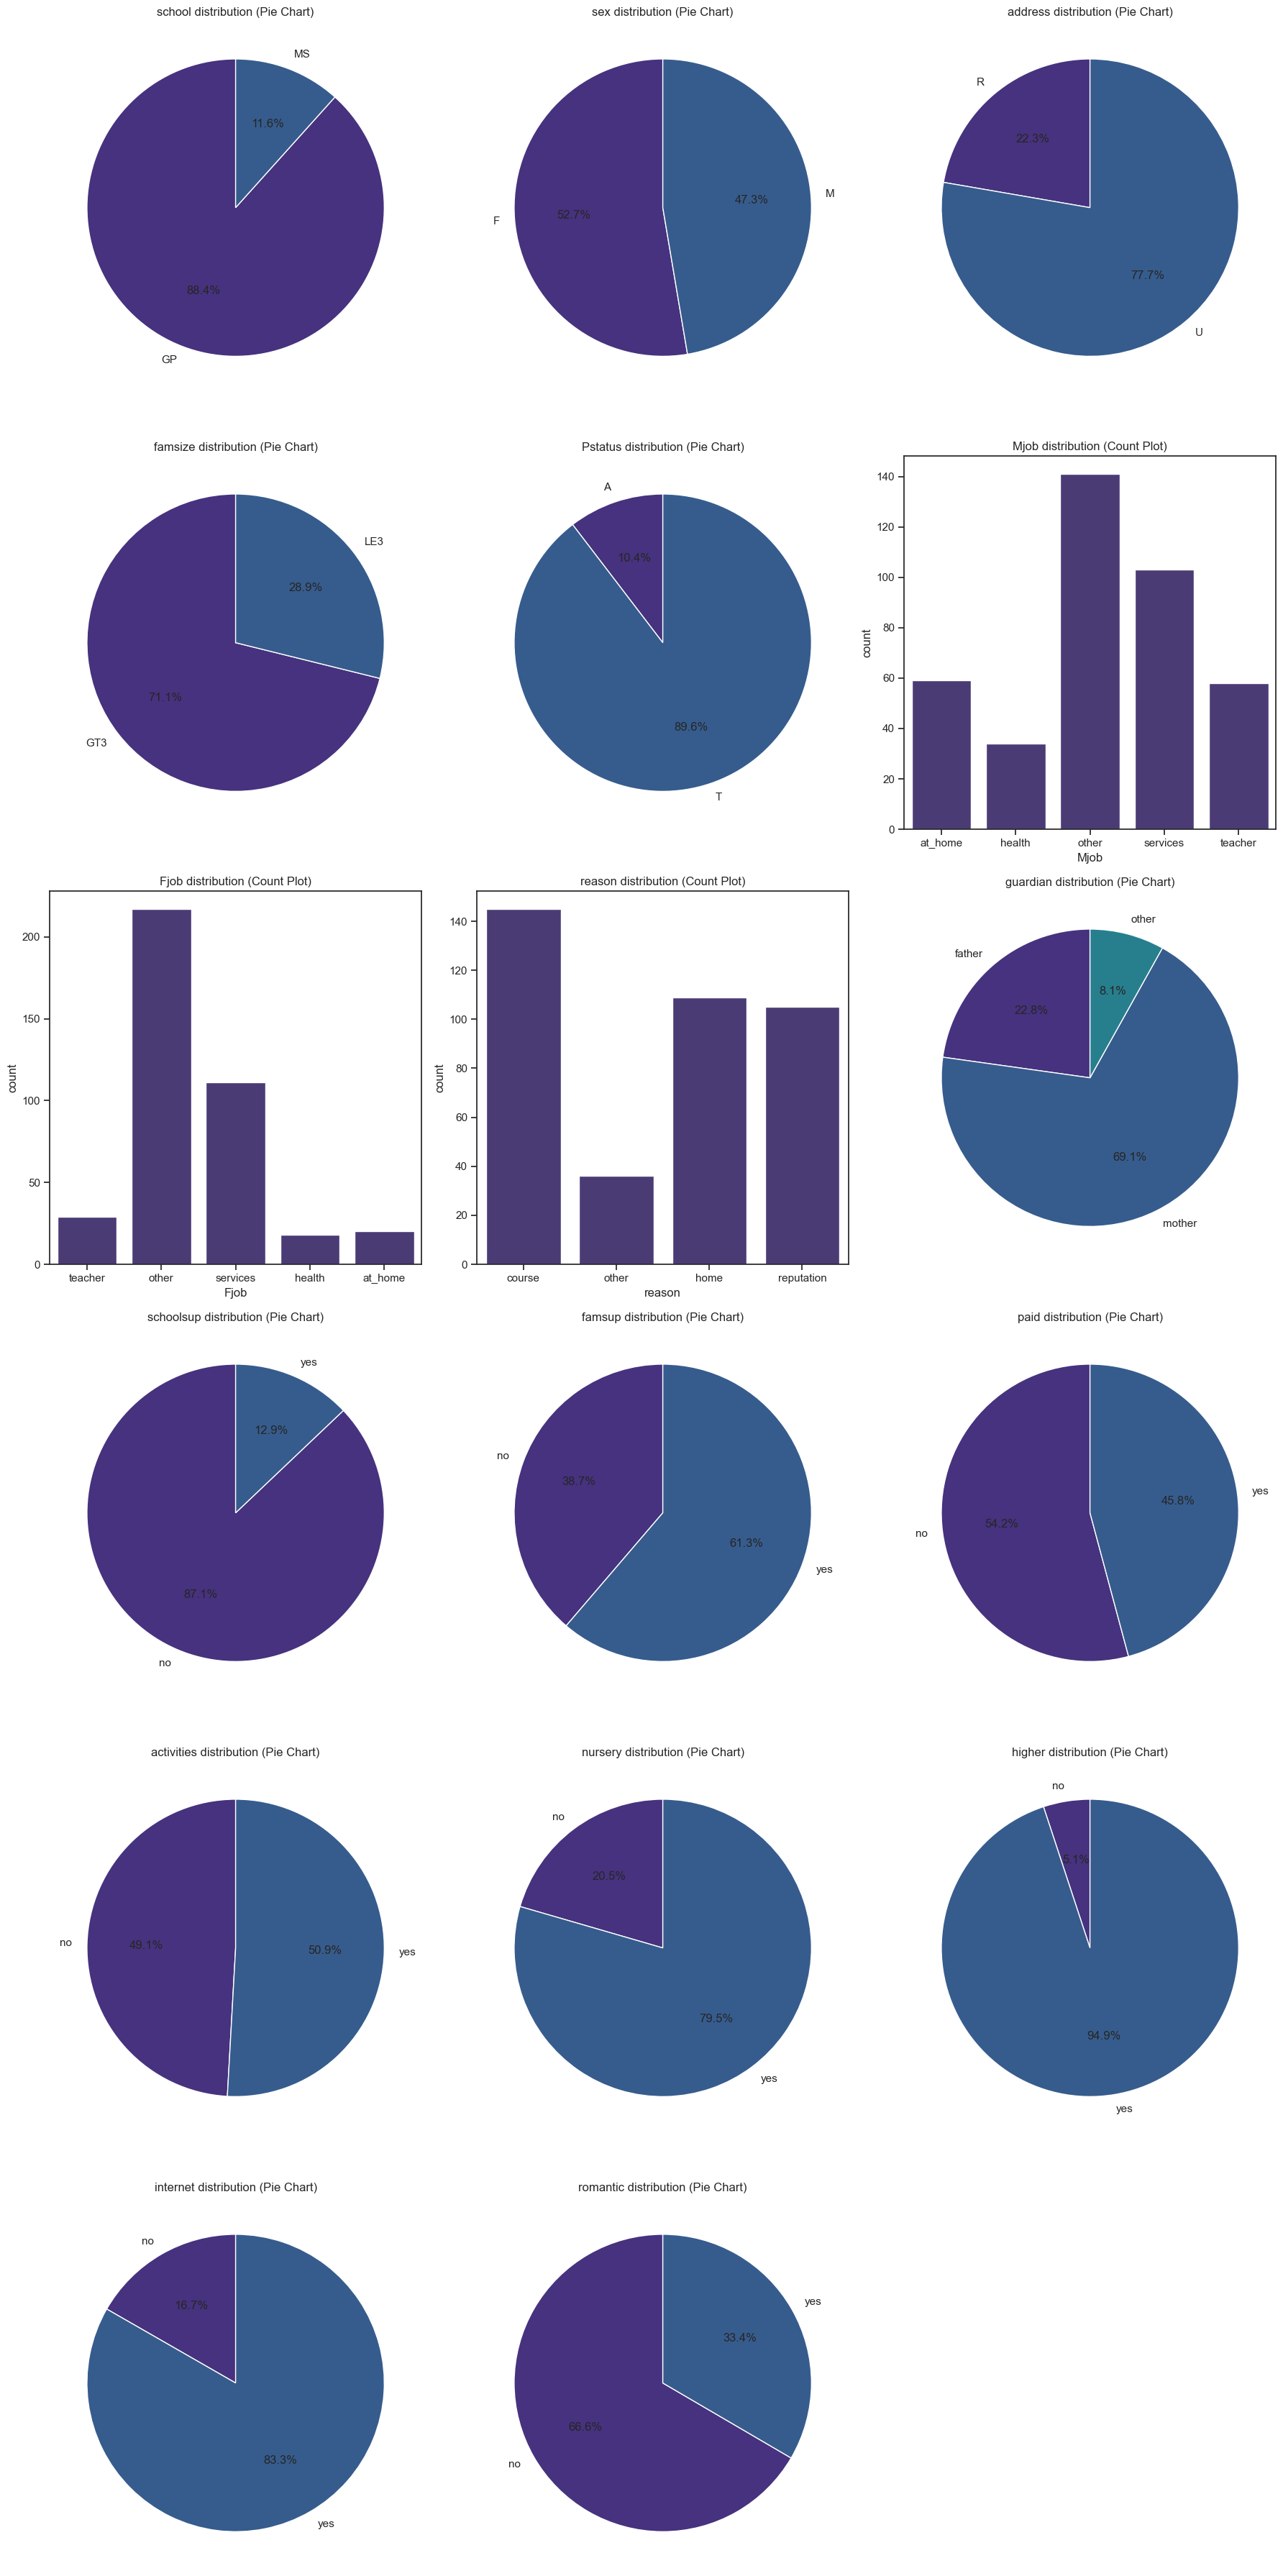

In [60]:
plt.rcParams["font.family"] = "monospace"
sns.set_theme(style='ticks', palette='viridis')


# Count the number of subplots needed
num_cols = len(cate_cols)
rows = (num_cols + 2) // 3  # This calculates how many rows we need (3 plots per row)

fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))  # Create subplots grid
axes = axes.flatten()  # Flatten the 2D axes array to 1D for easy iteration

for idx, col in enumerate(cate_cols):
    ax = axes[idx]  # Pick the appropriate axis for the current plot
    unique_values_count = df[col].nunique()  # Get the number of unique values in the column
    
    if unique_values_count <= 3:
        # Plot a pie chart if unique values are <= 3
        vals = df[col].values
        unique_values, counts = np.unique(vals, return_counts=True)
        
        ax.pie(counts, labels=unique_values, autopct='%1.1f%%', startangle=90)
        ax.set_facecolor('black')  # Set background color for pie chart
        ax.set_title(f"{col} distribution (Pie Chart)")

    else:
        # Plot a count plot if unique values are > 3
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f"{col} distribution (Count Plot)")

# Remove any empty subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Numerical data distribution

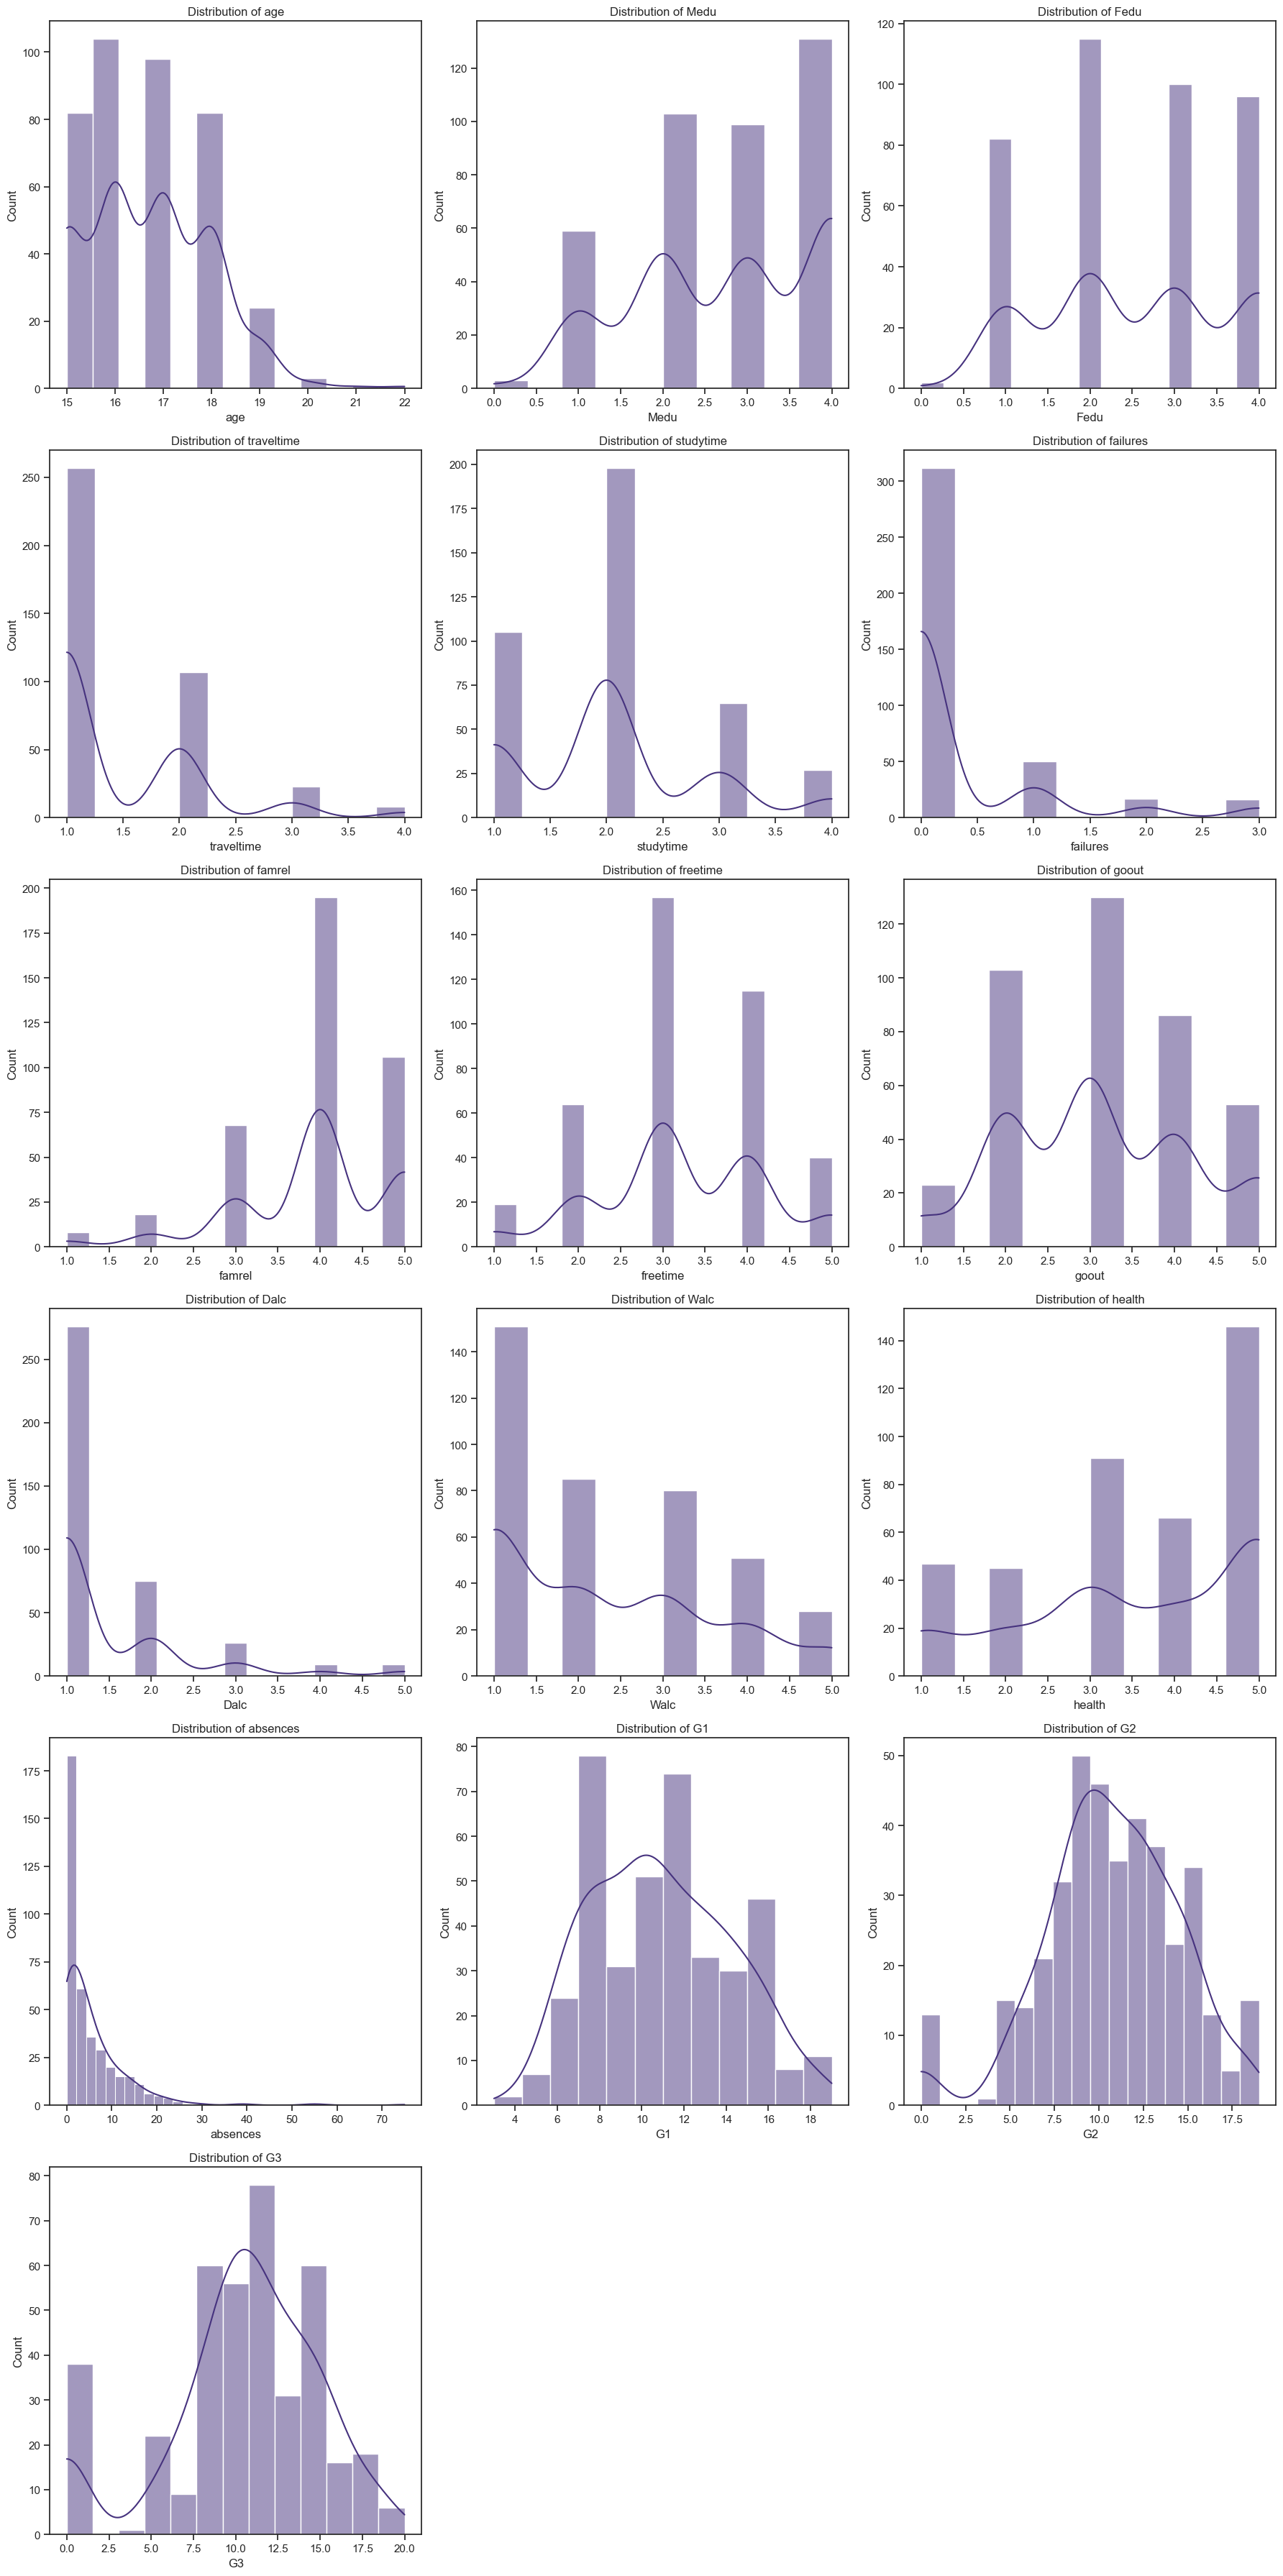

In [61]:
# Count the number of subplots needed
num_cols_len = len(numerical_cols)
rows = (num_cols_len + 2) // 3  # This calculates how many rows we need (3 plots per row)

fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))  # Create subplots grid
axes = axes.flatten()  # Flatten the 2D axes array to 1D for easy iteration

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]  # Pick the appropriate axis for the current plot

    # Use histplot to plot directly on the provided ax
    sns.histplot(df[col], kde=True, ax=ax)  # kde=True to plot a histogram with KDE
    ax.set_title(f"Distribution of {col}")

# Remove any empty subplots if there are fewer than (rows * 3)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


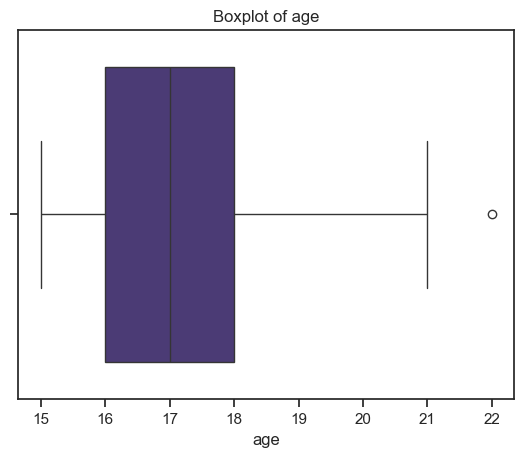

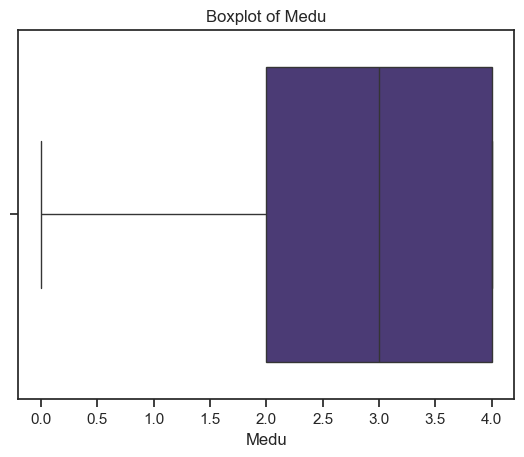

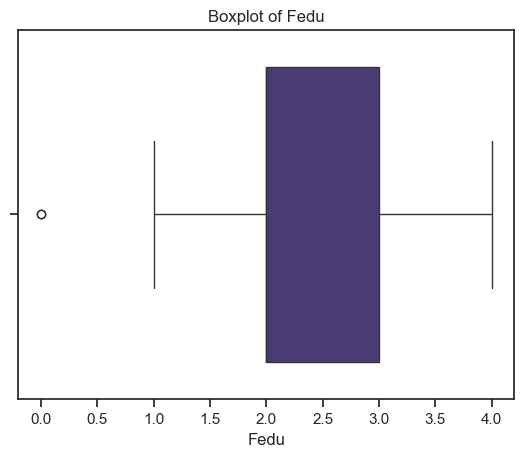

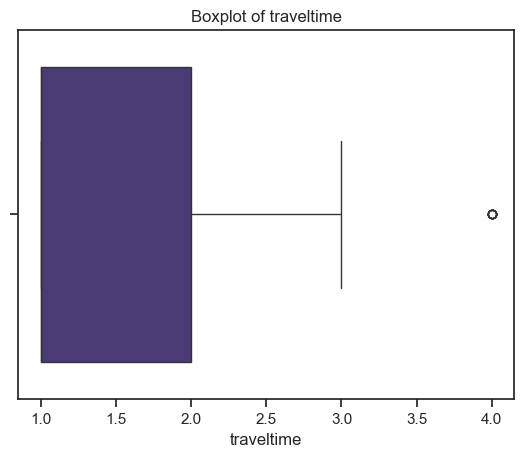

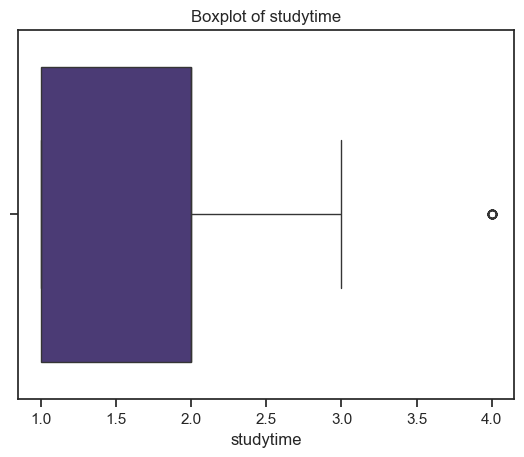

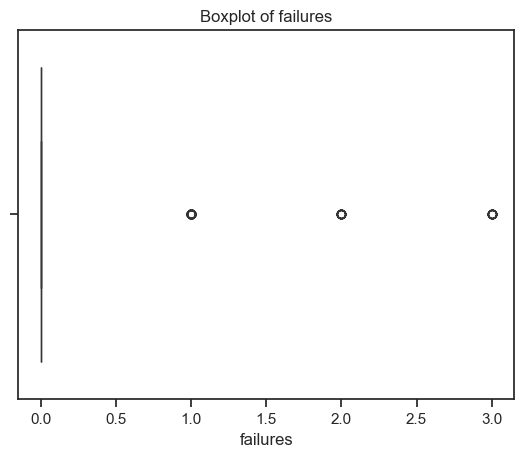

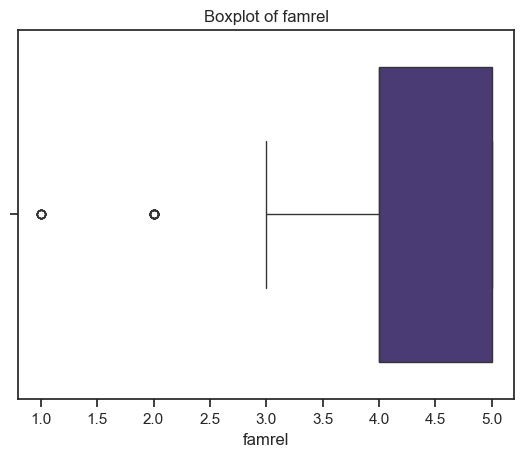

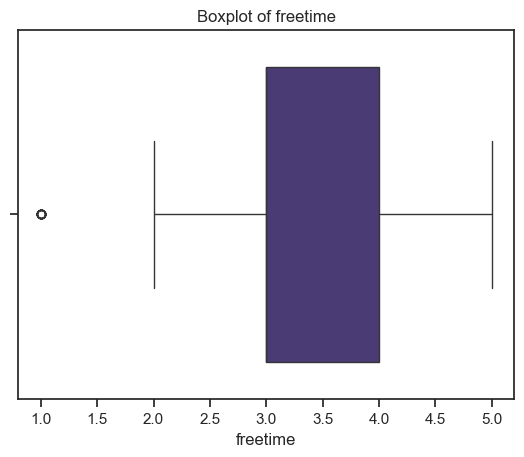

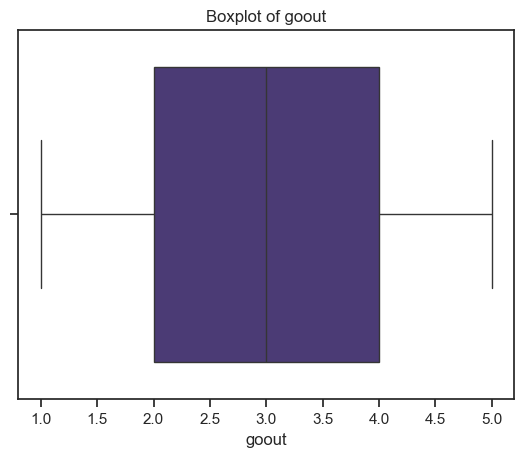

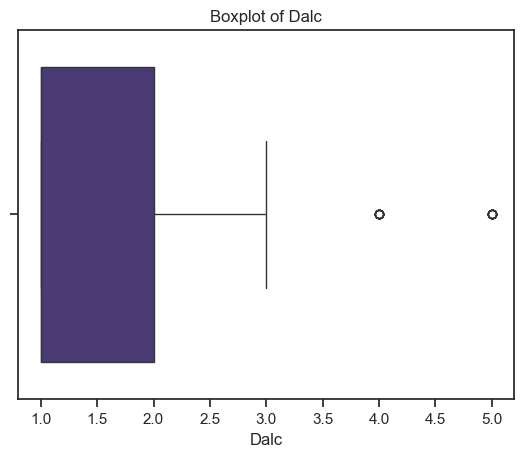

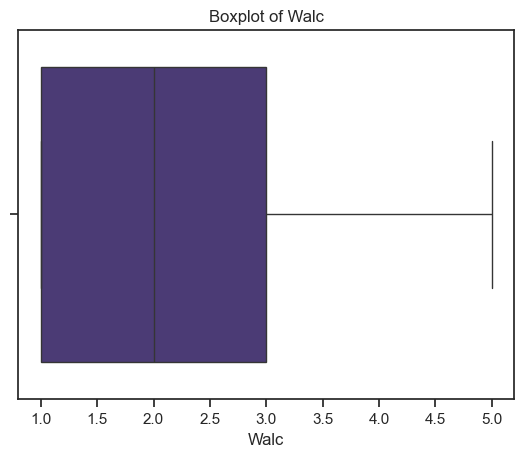

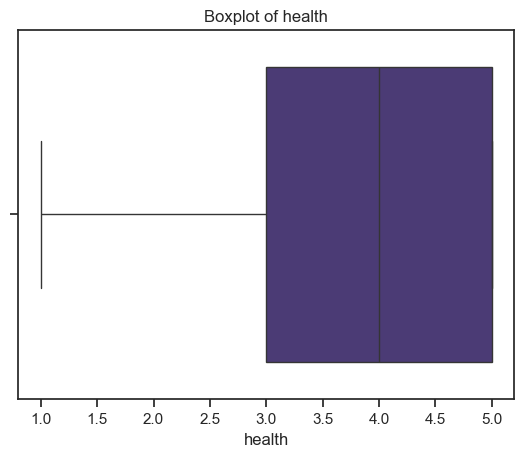

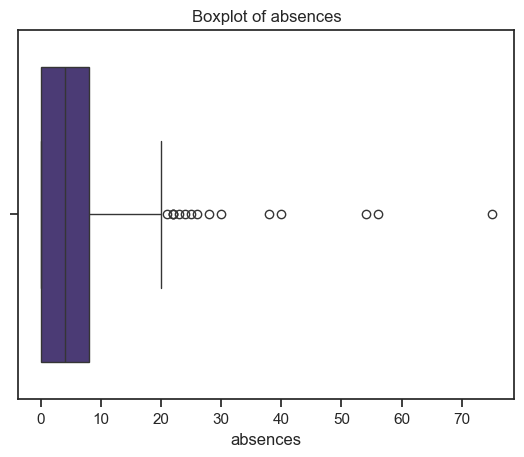

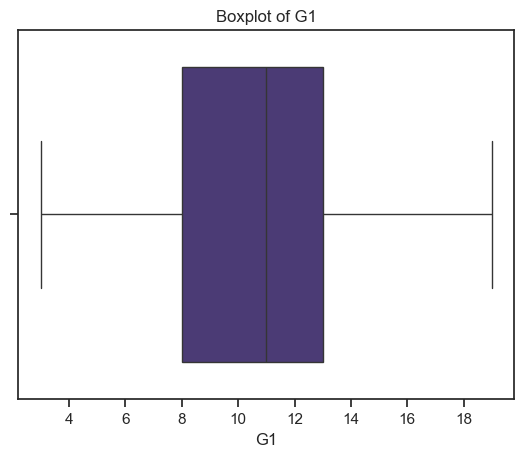

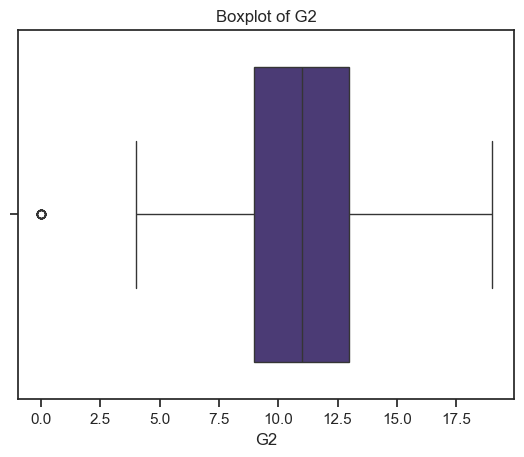

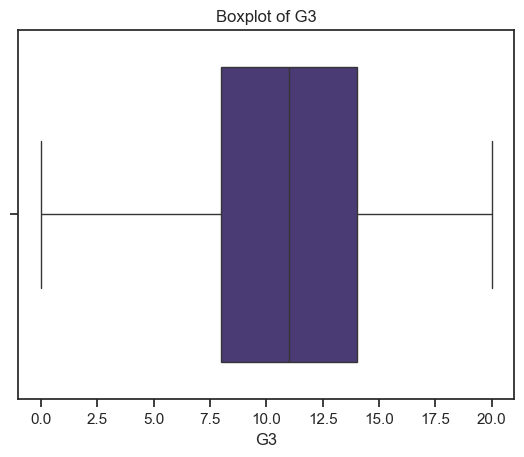

In [62]:
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## Absence Vs Grade

<Axes: xlabel='absences', ylabel='G3'>

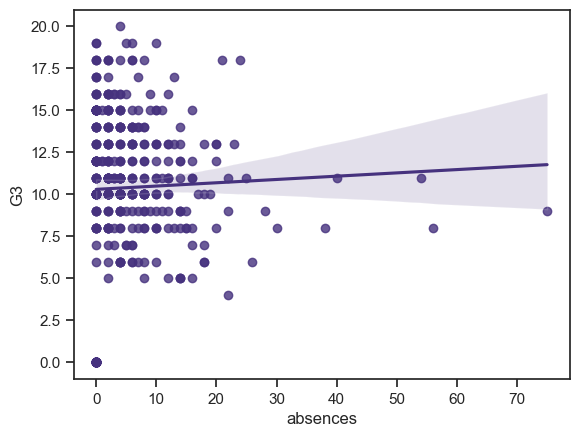

In [63]:
sns.regplot(x='absences', y='G3', data=df)

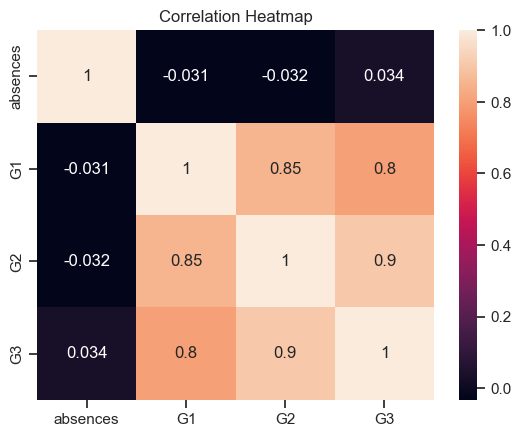

In [64]:
sns.heatmap(df[['absences', 'G1', 'G2', 'G3']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [65]:
numerical_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

## Age Vs Grade

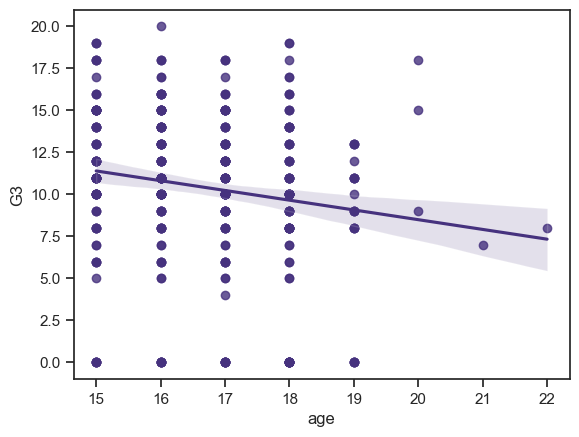

In [66]:
sns.regplot(x='age', y='G3', data=df)
plt.show()

In [67]:
age_grade = df.groupby("age").aggregate({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
age_grade.reset_index(inplace=True)
age_grade

,age,G1,G2,G3
0,15,11.231707,11.365854,11.256098
1,16,10.942308,11.182692,11.028846
2,17,10.897959,10.479592,10.275510
3,18,10.719512,10.134146,9.548780
4,19,10.250000,9.250000,8.208333
5,20,13.666667,13.666667,14.000000
6,21,10.000000,8.000000,7.000000
7,22,6.000000,8.000000,8.000000


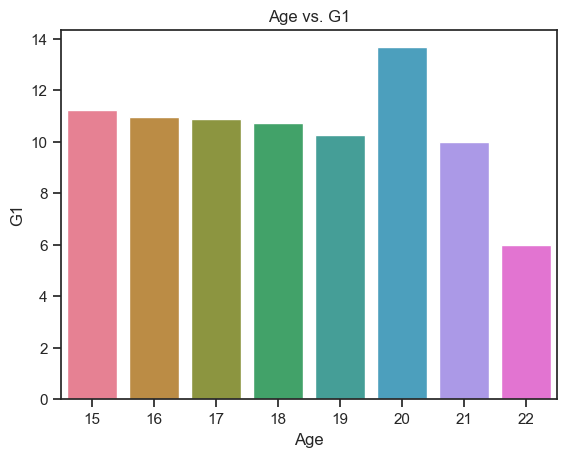

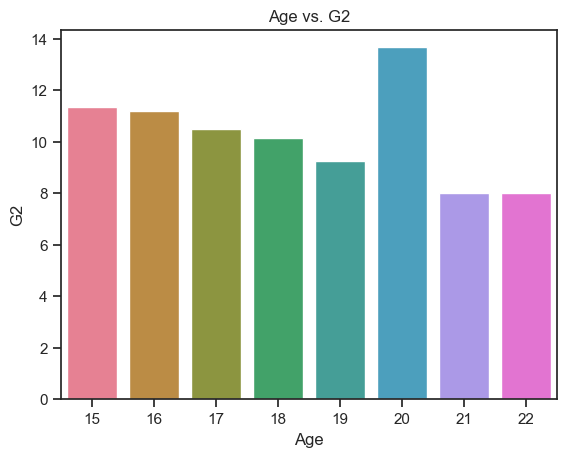

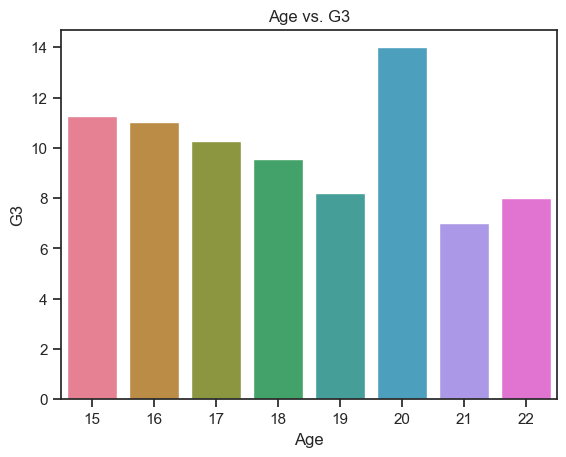

In [68]:
grades = ['G1', 'G2', 'G3']

for grade in grades:
    sns.barplot(data=age_grade, x='age', y=grade, palette='husl').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}')
    plt.show()

## Mother's Job and Education

In [69]:
MotherJop_Edu = df.groupby("Mjob").aggregate({"Medu": "mean"})
MotherJop_Edu.reset_index(inplace=True)
MotherJop_Edu.sort_values(by='Medu', ascending=False, inplace=True)

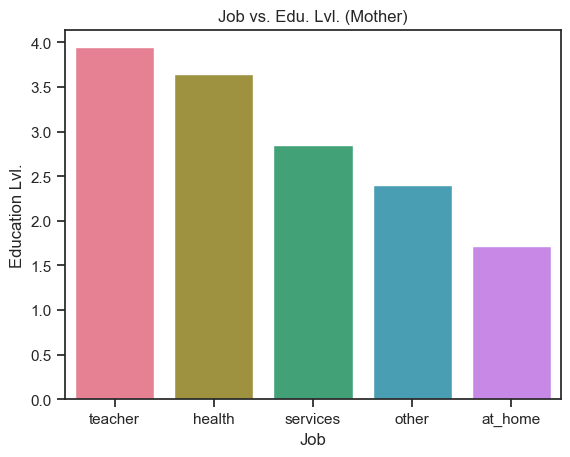

In [70]:
sns.barplot(x='Mjob', y='Medu', data=MotherJop_Edu , palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Mother)')
plt.show()

## Father's job & education

In [71]:
FatherJop_Edu = df.groupby("Fjob").aggregate({"Fedu": "mean"})
FatherJop_Edu.reset_index(inplace=True)
FatherJop_Edu.sort_values(by='Fedu', ascending=False, inplace=True)

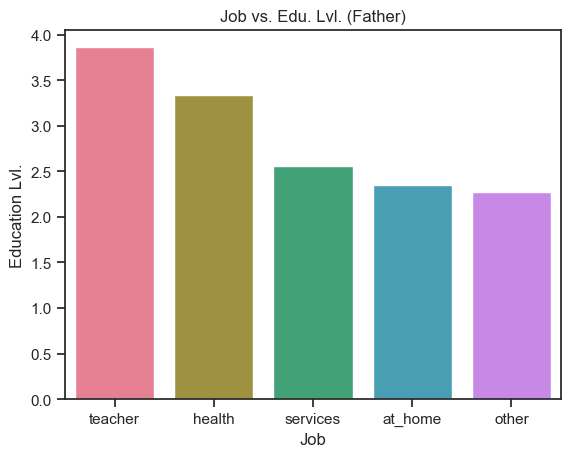

In [72]:
sns.barplot(x='Fjob', y='Fedu', data=FatherJop_Edu ,palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Father)')
plt.show()

## Activites Vs Grades

In [73]:
act_gr = df.groupby("activities").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
act_gr

,activities,G1,G2,G3
0,no,10.716495,10.520619,10.340206
1,yes,11.094527,10.900498,10.487562


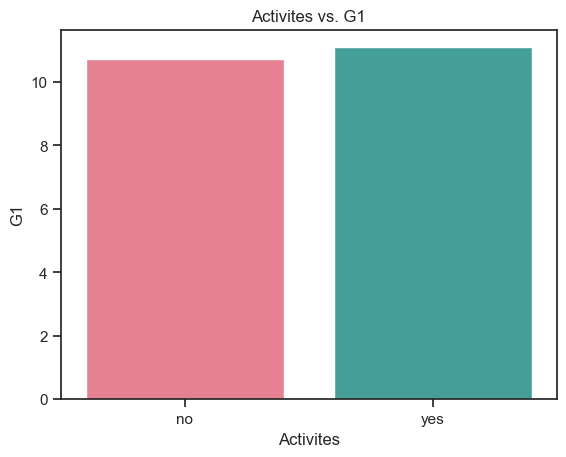

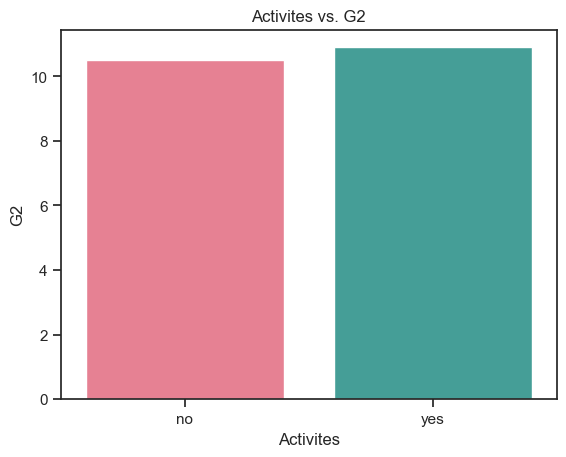

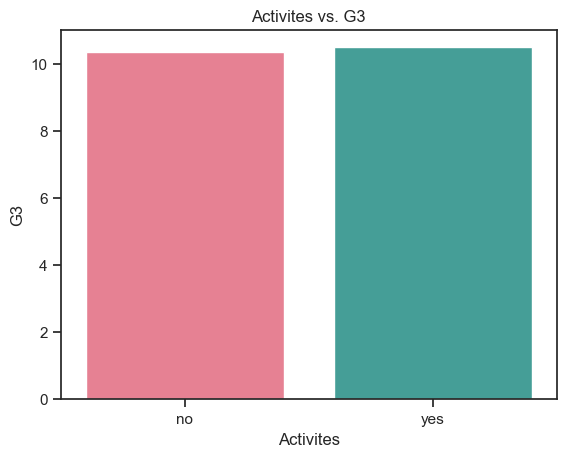

In [74]:
for grade in grades:
    sns.barplot(data=act_gr, x='activities', y=grade, palette='husl').set(xlabel='Activites', ylabel=grade, title=f'Activites vs. {grade}');
    plt.show()

## Go out Vs Grades

In [75]:
out_gr = df.groupby("goout").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
out_gr

,goout,G1,G2,G3
0,1,11.130435,10.782609,9.869565
1,2,11.368932,11.456311,11.194175
2,3,11.276923,11.053846,10.961538
3,4,10.430233,10.058140,9.651163
4,5,9.792453,9.471698,9.037736


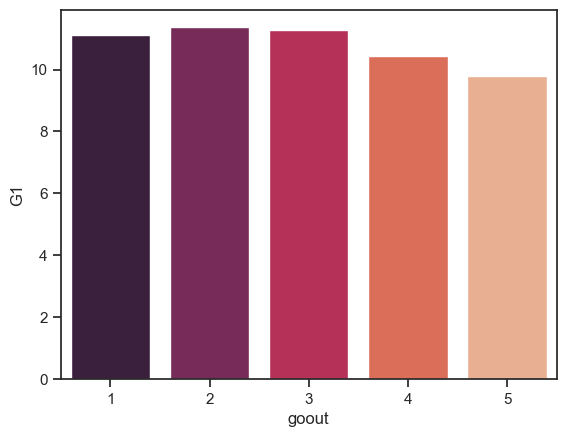

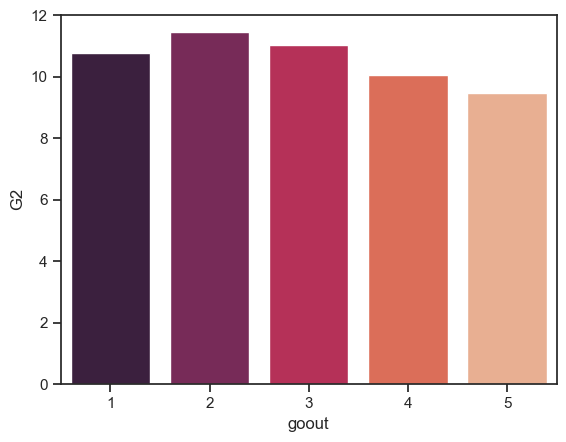

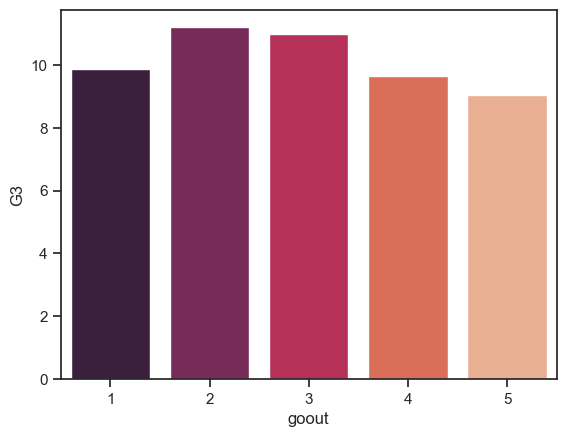

In [76]:
for grade in grades:
    sns.barplot(data=out_gr, x='goout', y=grade, palette='rocket')
    plt.show()

## Making the Model

In [77]:
X = df.drop('G3', axis=1)
y = df['G3']


In [78]:
numerical_cols = X.select_dtypes(include=np.number).columns
cate_cols = X.select_dtypes(include='object').columns

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
categ_pipeline = Pipeline(steps=[
('selector', DataFrameSelector(cate_cols)),
('ohe', OneHotEncoder(sparse_output=False))
])

num_pipeline = Pipeline(steps=[
('selector', DataFrameSelector(numerical_cols)),
('scaler', StandardScaler()),
])


total_pipeline = FeatureUnion(transformer_list=[
('num', num_pipeline),
('categ', categ_pipeline)])

X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)



## Training Moelds

In [81]:
model = LinearRegression()
model.fit(X_train_final, y_train)

LinearRegression()

In [82]:
test_pred = model.predict(X_test_final)
train_pred = model.predict(X_train_final)

In [83]:
def eval(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

def cross_val(model):
    pred = cross_val_score(model, X_train_final, y_train, cv=10)
    return pred.mean()

In [84]:
results_df_linear_regression = pd.DataFrame(data=[["Linear Regression", *eval(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MSE', 'R2 Square', "Cross Validation"])
results_df_linear_regression

,Model,MSE,R2 Square,Cross Validation
0,Linear Regression,5.664851,0.723734,0.82009


In [85]:
las = Lasso()
las.fit(X_train_final, y_train)

Lasso()

In [86]:
las_test_pred = las.predict(X_test_final)
las_train_pred = las.predict(X_train_final)

In [87]:
results_df_lasso = pd.DataFrame(data=[["Lasso", *eval(y_test, las_test_pred ) , cross_val(Lasso())]], 
                          columns=['Model', 'MSE', 'R2 Square', "Cross Validation"])
results_df_lasso

,Model,MSE,R2 Square,Cross Validation
0,Lasso,4.956192,0.758294,0.775074


In [88]:
rid = Ridge()
rid.fit(X_train_final, y_train)

Ridge()

In [89]:
rid_test_pred = rid.predict(X_test_final)
rid_train_pred = rid.predict(X_train_final)

In [90]:
results_df_ridge = pd.DataFrame(data=[["ridge", *eval(y_test, rid_test_pred ) , cross_val(Ridge())]], 
                          columns=['Model', 'MSE', 'R2 Square', "Cross Validation"])
results_df_ridge

,Model,MSE,R2 Square,Cross Validation
0,ridge,5.624165,0.725718,0.821029


In [91]:
random_forest = RandomForestRegressor()
params = {"n_estimators" : np.arange(700, 1000, 50), "max_depth" : np.arange(2, 10, 2), "min_samples_split" : np.arange(2, 10, 2)} 
grid_model = GridSearchCV(estimator= random_forest, param_grid=params, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
grid_model.fit(X_train_final, y_train)
print(f"Grid model best paraemeters {grid_model.best_params_}")
best_model = grid_model.best_estimator_
best_model.fit(X_train_final, y_train)

Grid model best paraemeters {'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 700}


RandomForestRegressor(max_depth=6, min_samples_split=4, n_estimators=700)

In [92]:
forest_test_pred = best_model.predict(X_test_final)
forest_train_pred = best_model.predict(X_train_final)

In [93]:
results_df_forest = pd.DataFrame(data=[["forest", *eval(y_test, forest_test_pred) , cross_val(Ridge())]], 
                          columns=['Model', 'MSE', 'R2 Square', "Cross Validation"])
results_df_forest

,Model,MSE,R2 Square,Cross Validation
0,forest,3.964833,0.806641,0.821029


In [94]:
final_results = pd.concat([results_df_linear_regression, results_df_lasso, results_df_ridge, results_df_forest], axis=0).reset_index()
final_results = final_results.drop('index', axis=1)
final_results

,Model,MSE,R2 Square,Cross Validation
0,Linear Regression,5.664851,0.723734,0.820090
1,Lasso,4.956192,0.758294,0.775074
2,ridge,5.624165,0.725718,0.821029
3,forest,3.964833,0.806641,0.821029


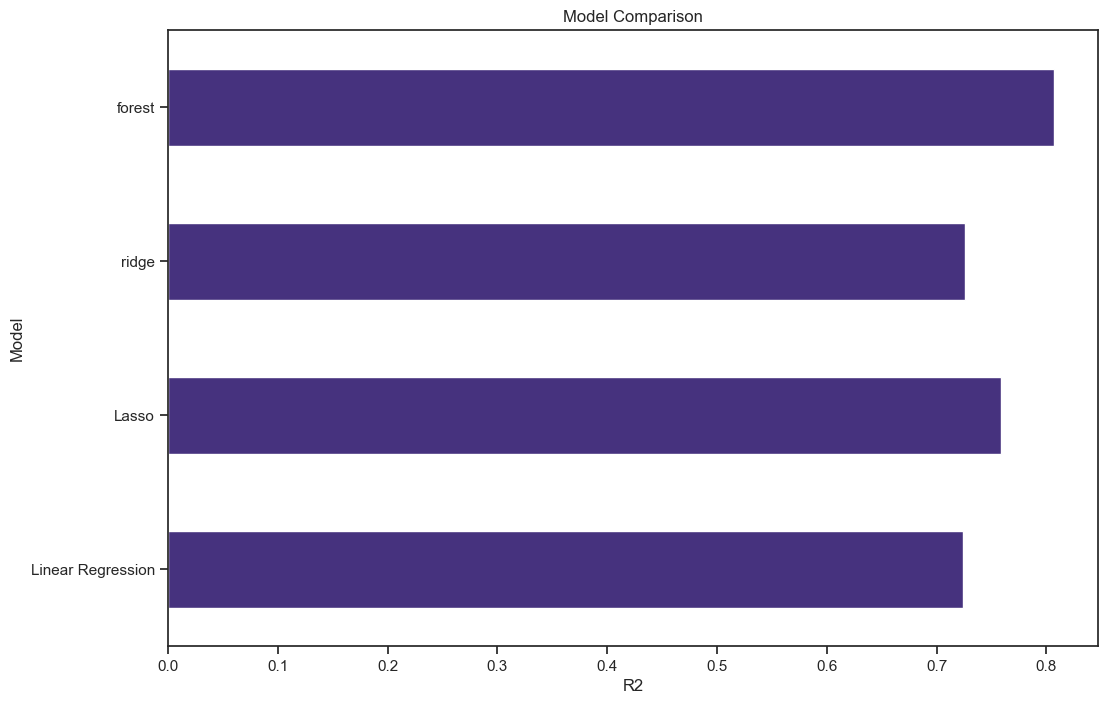

In [95]:
final_results.set_index('Model', inplace=True)
final_results['R2 Square'].plot(kind='barh', figsize=(12, 8))
plt.xlabel('R2')
plt.title('Model Comparison')
plt.show()
